<a href="https://colab.research.google.com/github/fralfaro/MAT281_20XX/blob/main/docs/lectures/data_manipulation/sc_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Sympy

<img src="https://drive.google.com/uc?export=view&id=1fcZjGCuyGiugsrVBjlQ9UIfYwfEDmdEq" width = "200" align="center"/>


## Introducción

Hay dos sistemas de álgebra computarizada (CAS) notables para Python:

* [SymPy](http://sympy.org/en/index.html): un módulo de Python que se puede utilizar en cualquier programa de Python, o en una sesión de IPython, que proporciona potentes funciones de CAS.
* [Sage](http://www.sagemath.org/) - Sage es un entorno CAS muy potente y con todas las funciones que tiene como objetivo proporcionar un sistema de código abierto que compita con Mathematica y Maple. Sage no es un módulo Python normal, sino un entorno CAS que utiliza Python como lenguaje de programación.

`Sage` es en algunos aspectos más poderoso que `SymPy`, pero ambos ofrecen una funcionalidad CAS muy completa. La ventaja de SymPy es que es un módulo Python normal y se integra bien con el portátil IPython.

Para comenzar a usar SymPy en un programa o cuaderno de Python, importe el módulo `sympy`:

In [1]:
from sympy import *

Para obtener una salida con formato $\LaTeX $ atractiva, ejecute:

In [2]:
init_printing()

# or with older versions of sympy/ipython, load the IPython extension
#%load_ext sympy.interactive.ipythonprinting
# or
#%load_ext sympyprinting

## Variables simbólicas

En `SymPy` necesitamos crear símbolos para las variables con las que queremos trabajar. Podemos crear un nuevo símbolo usando la clase `Symbol`:

In [3]:
x = Symbol('x')

In [4]:
(pi + x)**2

In [5]:
# alternative way of defining symbols
a, b, c = symbols("a, b, c")

In [6]:
type(a)

sympy.core.symbol.Symbol

Podemos agregar suposiciones a los símbolos cuando los creamos:

In [7]:
x = Symbol('x', real=True)

In [8]:
x.is_imaginary

False

In [9]:
x = Symbol('x', positive=True)

In [10]:
x > 0

### Números complejos

La unidad imaginaria se denota "I" en `Sympy`.

In [11]:
1+1*I

In [12]:
I**2

In [13]:
(x * I + 1)**2

### Numeros racionales

Hay tres tipos numéricos diferentes en SymPy: `Real`,` Rational`, ʻInteger`:

In [14]:
r1 = Rational(4,5)
r2 = Rational(5,4)

In [15]:
r1

In [16]:
r1+r2

In [17]:
r1/r2

## Evaluación numérica

`SymPy` usa una biblioteca para precisión artística como backend numérico, y tiene expresiones `SymPy` predefinidas para una serie de constantes matemáticas, como: `pi`, ʻe`, ʻoo` para infinito.

Para evaluar una expresión numéricamente podemos usar la función `evalf` (o `N`). Toma un argumento "n" que especifica el número de dígitos significativos.

In [18]:
pi.evalf(n=50)

In [19]:
y = (x + pi)**2

In [20]:
N(y, 5) # same as evalf

Cuando evaluamos numéricamente expresiones algebraicas, a menudo queremos sustituir un símbolo por un valor numérico. En `SymPy` lo hacemos usando la función `subs`:

In [21]:
y.subs(x, 1.5)

In [22]:
N(y.subs(x, 1.5))

Por supuesto, la función `subs` también se puede utilizar para sustituir símbolos y expresiones:

In [23]:
y.subs(x, a+pi)

También podemos combinar la evolución numérica de expresiones con matrices `Numpy`:

In [24]:
import numpy
import matplotlib.pyplot as plt


In [25]:
x_vec = numpy.arange(0, 10, 0.1)

In [26]:
y_vec = numpy.array([N(((x + pi)**2).subs(x, xx)) for xx in x_vec])

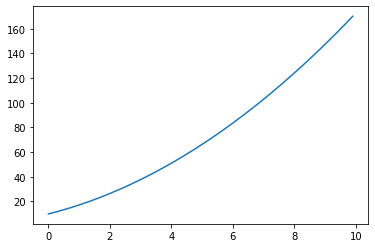

In [27]:
fig, ax = plt.subplots()
ax.plot(x_vec, y_vec);

Sin embargo, este tipo de evolución numérica puede ser muy lenta, y hay una manera mucho más eficiente de hacerlo: use la función `lambdify` para" compilar "una expresión Sympy en una función que sea mucho más eficiente para evaluar numéricamente:

In [28]:
f = lambdify([x], (x + pi)**2, 'numpy')  # the first argument is a list of variables that
                                         # f will be a function of: in this case only x -> f(x)

In [29]:
y_vec = f(x_vec)  # now we can directly pass a numpy array and f(x) is efficiently evaluated

La aceleración cuando se utilizan funciones `lambdify`  en lugar de una evaluación numérica directa puede ser significativa, a menudo de varios órdenes de magnitud. Incluso en este ejemplo simple obtenemos una velocidad significativa:

In [30]:
%%timeit

y_vec = numpy.array([N(((x + pi)**2).subs(x, xx)) for xx in x_vec])

16.9 ms ± 473 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [31]:
%%timeit

y_vec = f(x_vec)

2.89 µs ± 48.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Manipulaciones algebraicas

Uno de los usos principales de un CAS es realizar manipulaciones algebraicas de expresiones. Por ejemplo, podríamos querer expandir un producto, factorizar una expresión o simplemente una expresión. Las funciones para realizar estas operaciones básicas en SymPy se muestran en esta sección.

### Expandir y factorizar

Los primeros pasos en una manipulación algebraica

In [32]:
(x+1)*(x+2)*(x+3)

In [33]:
expand((x+1)*(x+2)*(x+3))

La función `expand` toma un número de argumentos de palabras clave que podemos decirle a las funciones qué tipo de expansiones queremos que se realicen. Por ejemplo, para expandir expresiones trigonométricas, use el argumento de palabra clave `trig = True`:

In [34]:
sin(a+b)

In [35]:
expand(sin(a+b), trig=True)

Consulte `help (expand)` para obtener una explicación detallada de los distintos tipos de expansiones que pueden realizar las funciones de ʻexpand`.

Lo contrario, una expansión de producto es, por supuesto, factorización. El factor de una expresión en SymPy usa la función `factor`:

In [36]:
factor(x**3 + 6 * x**2 + 11*x + 6)

### Simplificar

El "simplificar" intenta simplificar una expresión en una expresión agradable, utilizando varias técnicas. También existen alternativas más específicas a las funciones `simplify`:` trigsimp`, `powsimp`,` logcombine`, etc.

Los usos básicos de estas funciones son los siguientes:

In [37]:
# simplify expands a product
simplify((x+1)*(x+2)*(x+3))

In [38]:
# simplify uses trigonometric identities
simplify(sin(a)**2 + cos(a)**2)

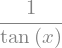

In [39]:
simplify(cos(x)/sin(x))

### Separados y juntos

Para manipular expresiones simbólicas de fracciones, podemos usar las funciones `apart` y `together`:

**apart**

In [40]:
f1 = 1/((a+1)*(a+2))

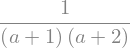

In [41]:
f1

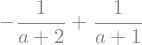

In [42]:
apart(f1)

**together**

In [43]:
f2 = 1/(a+2) + 1/(a+3)

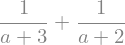

In [44]:
f2

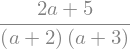

In [45]:
together(f2)

Simplificar generalmente combina fracciones pero no factoriza:

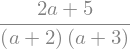

In [46]:
simplify(f2)

## Cálculo

Además de las manipulaciones algebraicas, el otro uso principal de CAS es hacer cálculo, como derivadas e integrales de expresiones algebraicas.

### Diferenciación

La diferenciación suele ser sencilla. Utilice la función `diff`. El primer argumento es la expresión para tomar la derivada y el segundo argumento es el símbolo por el cual tomar la derivada:

In [47]:
y

In [48]:
diff(y**2, x)

Para derivados de orden superior podemos hacer:

In [49]:
diff(y**2, x, x)

In [50]:
diff(y**2, x, 2) # same as above

Para calcular la derivada de una expresión multivariante, podemos hacer:

In [51]:
x, y, z = symbols("x,y,z")

In [52]:
f = sin(x*y) + cos(y*z)

$\frac{d^3f}{dxdy^2}$

In [53]:
diff(f, x, 1, y, 2)

### Integración

La integración se realiza de manera similar:

In [54]:
f

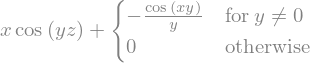

In [55]:
integrate(f, x)

Al proporcionar límites para la variable de integración, podemos evaluar integrales definidas:

In [56]:
integrate(f, (x, -1, 1))

y también integrales impropias:

In [57]:
integrate(exp(-x**2), (x, -oo, oo))

Recuerde, `oo` es la notación SymPy para infinito.

### Sumas y productos

Podemos evaluar sumas y productos usando las funciones: 'Suma'

In [58]:
n = Symbol("n")

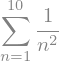

In [59]:
Sum(1/n**2, (n, 1, 10))

In [60]:
Sum(1/n**2, (n,1, 10)).evalf()

In [61]:
Sum(1/n**2, (n, 1, oo)).evalf()

Los productos funcionan de la misma manera:

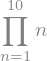

In [62]:
Product(n, (n, 1, 10)) # 10!

### Límites

Los límites se pueden evaluar utilizando la función `limit`. Por ejemplo,

In [63]:
limit(sin(x)/x, x, 0)

Podemos usar `limit` para verificar el resultado de la derivación usando la función `diff`:

In [64]:
f

In [65]:
diff(f, x)

$\displaystyle \frac{\mathrm{d}f(x,y)}{\mathrm{d}x} = \frac{f(x+h,y)-f(x,y)}{h}$

In [66]:
h = Symbol("h")

In [67]:
limit((f.subs(x, x+h) - f)/h, h, 0)

Podemos cambiar la dirección desde la que nos acercamos al punto límite usando el argumento `dir`:

In [68]:
limit(1/x, x, 0, dir="+")

In [69]:
limit(1/x, x, 0, dir="-")

### Serie

La expansión de la serie también es una de las características más útiles de un CAS. En SymPy podemos realizar una expansión en serie de una expresión usando la función `series`:

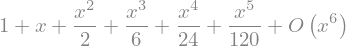

In [70]:
series(exp(x), x)

De forma predeterminada, expande la expresión alrededor de $x = 0$, pero podemos expandir alrededor de cualquier valor de $x$ al incluir explícitamente un valor en la llamada a la función:

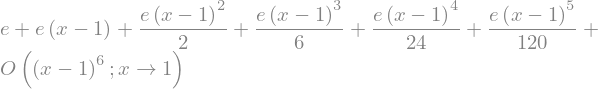

In [71]:
series(exp(x), x, 1)

Y podemos definir explícitamente en qué orden se debe realizar la expansión de la serie:

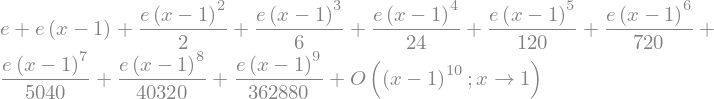

In [72]:
series(exp(x), x, 1, 10)

La expansión de la serie incluye el orden de la aproximación, lo cual es muy útil para realizar un seguimiento del orden de validez cuando hacemos cálculos con expansiones de la serie de diferente orden:

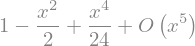

In [73]:
s1 = cos(x).series(x, 0, 5)
s1

In [74]:
s2 = sin(x).series(x, 0, 2)
s2

In [75]:
expand(s1 * s2)

Si queremos deshacernos de la información del error, podemos usar el método `removeO`:

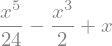

In [76]:
expand(s1.removeO() * s2.removeO())

Pero tenga en cuenta que esta no es la expansión correcta de $ \cos(x) \sin(x)$ a $ 5 $ ésimo orden:

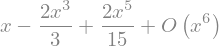

In [77]:
(cos(x)*sin(x)).series(x, 0, 6)

## Álgebra lineal

### Matrices

Las matrices se definen usando la clase `Matrix`:

In [78]:
m11, m12, m21, m22 = symbols("m11, m12, m21, m22")
b1, b2 = symbols("b1, b2")

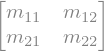

In [79]:
A = Matrix([[m11, m12],[m21, m22]])
A

In [80]:
b = Matrix([[b1], [b2]])
b

Con las instancias de la clase `Matrix` podemos hacer las operaciones habituales de álgebra matricial:

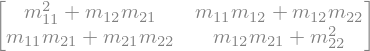

In [81]:
A**2

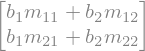

In [82]:
A * b

Y calcular determinantes e inversas, y similares:

In [83]:
A.det()

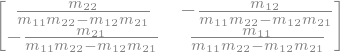

In [84]:
A.inv()

## Resolver ecuaciones

Para resolver ecuaciones y sistemas de ecuaciones podemos usar la función `resolver`:

In [85]:
solve(x**2 - 1, x)

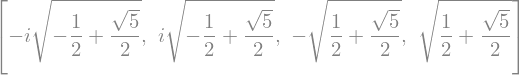

In [86]:
solve(x**4 - x**2 - 1, x)

Sistema de ecuaciones:

In [87]:
solve([x + y - 1, x - y - 1], [x,y])

En cuanto a otras expresiones simbólicas:

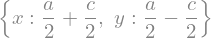

In [88]:
solve([x + y - a, x - y - c], [x,y])

## Referencias

* [The SymPy projects web page](http://sympy.org/en/index.html)
* [The source code of SymPy](https://github.com/sympy/sympy)
* [Online version of SymPy for testing and demonstrations](http://live.sympy.org)